In [96]:
#imports all the songs and creates a database
import pandas as pd
import os
import glob

os.chdir("your_path/lyrics-master/database")

lyrics = []
artists = []
names = []
for file in os.listdir(os.getcwd()):
    os.chdir(file)
    for artist in os.listdir(os.getcwd()):
        os.chdir(artist)
        for album in os.listdir(os.getcwd()):
            os.chdir(album)
            raw_filenames = [i for i in glob.glob('*')]
            for text in raw_filenames:
                song_file = open(text, 'r', encoding="utf8")
                song_words = []
                for line in song_file.readlines():
                    if "_" in line:
                        break
                    for word in line.replace("â€™", "\'").split():
                        song_words.append(word.lower())
                song_words = song_words[:-1]
                lyrics.append(song_words)
                artists.append(artist)
                names.append(text[:text.index(".txt")])
            os.chdir("../")
        os.chdir("../")
    os.chdir("../")
    
os.chdir("your_path")

music_data = pd.DataFrame(list(zip(names, artists, lyrics)), columns = ["Song Name", "Artist", "Lyrics"])
music_data

,Song Name,Artist,Lyrics
0,When I'm Gone,3 Doors Down,"[there’s, another, world, inside, of, me, that..."
1,Kryptonite,3 Doors Down,"[i, took, a, walk, around, the, world, to, eas..."
2,Best Of Me,A Day To Remember,"[what’d, you, expect, from, me?, it’s, not, my..."
3,City Of Ocala,A Day To Remember,"[fuck, ya!, remember, way, back, when?, they, ..."
4,Dead & Buried,A Day To Remember,"[let, me, find, the, way, that, i, can, make, ..."
...,...,...,...
3019,Alienation,ZSK,"[ich, suche, wirklich, nach, einer, erklärung,..."
3020,Mein Staat,ZSK,"[hast, du, dich, jemals, gefragt,, ob, das, wi..."
3021,Riot Radio,ZSK,"[take, a, look, at, you, take, a, look, at, ch..."
3022,Rough Boy,ZZ Top,"[what, in, the, world’s, come, all, over, me?,..."


In [97]:
#uses spotify api to scrape genre information on the music data
#must create a spotify developer's account
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'client_id'
client_secret = 'secret_id'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

genres = []
indices_to_delete = []
for index, row in music_data.iterrows():
    print(str(round(((index+1)/3024)*100, 2)) + "%", end='\r')
    result = sp.search(row["Artist"])
    if result['tracks']['items'] == []:
        indices_to_delete.append(index)
        continue
    track = result['tracks']['items'][0]
    
    artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
    if artist["genres"] == []:
        indices_to_delete.append(index)
        continue
    added = False
    for genre in artist["genres"]:
        if "metal" in genre or "punk" in genre or "rock" in genre or "grunge" in genre or "alternative" in genre or "hardcore" in genre:
            genres.append("Rock")
            added = True
            break
        elif "hip hop" in genre or "rap" in genre or "reggae" in genre:
            genres.append("Rap")
            added = True
            break
        elif "techno" in genre or "synthwave" in genre or "dance" in genre or "electro" in genre or "trance" in genre or "dubstep" in genre or "chillstep" in genre:
            genres.append("EDM")
            added = True
            break
        elif "country" in genre or "folk" in genre:
            genres.append("Country")
            added = True
            break
        elif "pop" in genre:
            genres.append("Pop")
            added = True
            break
    if added == False:
        genres.append("Pop")

genres

['Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Pop',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Pop',
 'Pop',
 'Pop',
 'Pop',
 'Pop',
 'Pop',
 'Pop',
 'EDM',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Pop',
 'Pop',
 'Pop',
 'EDM',
 'Rock',
 'Rock',
 'Pop',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Pop',
 'Pop',
 'Pop',
 'Pop',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'EDM',
 'Pop',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'EDM',
 'Rock',
 'Rock',
 'Rock',
 'Roc

In [98]:
#adds genres to database
music_data = music_data.drop(indices_to_delete)
music_data["Genres"] = genres
music_data = music_data.reset_index()
music_data

,index,Song Name,Artist,Lyrics,Genres
0,0,When I'm Gone,3 Doors Down,"[there’s, another, world, inside, of, me, that...",Rock
1,1,Kryptonite,3 Doors Down,"[i, took, a, walk, around, the, world, to, eas...",Rock
2,2,Best Of Me,A Day To Remember,"[what’d, you, expect, from, me?, it’s, not, my...",Rock
3,3,City Of Ocala,A Day To Remember,"[fuck, ya!, remember, way, back, when?, they, ...",Rock
4,4,Dead & Buried,A Day To Remember,"[let, me, find, the, way, that, i, can, make, ...",Rock
...,...,...,...,...,...
2914,3019,Alienation,ZSK,"[ich, suche, wirklich, nach, einer, erklärung,...",Rock
2915,3020,Mein Staat,ZSK,"[hast, du, dich, jemals, gefragt,, ob, das, wi...",Rock
2916,3021,Riot Radio,ZSK,"[take, a, look, at, you, take, a, look, at, ch...",Rock
2917,3022,Rough Boy,ZZ Top,"[what, in, the, world’s, come, all, over, me?,...",Rock


In [99]:
#gets counts of each genre
counts = music_data['Genres'].value_counts()
counts

Rock       1923
Pop         469
EDM         270
Rap         212
Country      45
Name: Genres, dtype: int64

In [100]:
#gets word count of lyrics
lyrics_counts = []
for index, row in music_data.iterrows():
    lyrics_counts.append(len(row["Lyrics"]))
    
lyrics_counts

[381,
 284,
 472,
 360,
 278,
 275,
 306,
 383,
 249,
 277,
 339,
 276,
 96,
 319,
 402,
 406,
 363,
 333,
 184,
 264,
 126,
 121,
 94,
 134,
 233,
 155,
 118,
 65,
 74,
 264,
 367,
 324,
 249,
 247,
 294,
 407,
 309,
 233,
 398,
 330,
 398,
 254,
 265,
 335,
 273,
 148,
 178,
 246,
 248,
 179,
 95,
 131,
 256,
 144,
 257,
 176,
 150,
 268,
 139,
 170,
 121,
 217,
 145,
 71,
 125,
 142,
 222,
 182,
 183,
 241,
 124,
 180,
 171,
 434,
 331,
 429,
 497,
 160,
 208,
 160,
 186,
 197,
 188,
 167,
 176,
 254,
 200,
 289,
 200,
 726,
 192,
 52,
 130,
 195,
 205,
 133,
 86,
 117,
 153,
 43,
 230,
 295,
 159,
 218,
 480,
 259,
 389,
 222,
 115,
 481,
 5,
 386,
 277,
 320,
 302,
 349,
 242,
 290,
 247,
 459,
 234,
 217,
 210,
 284,
 213,
 253,
 202,
 176,
 216,
 218,
 222,
 265,
 291,
 256,
 271,
 154,
 68,
 389,
 4,
 100,
 210,
 366,
 39,
 41,
 40,
 242,
 73,
 136,
 149,
 69,
 253,
 204,
 148,
 147,
 83,
 144,
 171,
 38,
 75,
 16,
 50,
 85,
 57,
 71,
 50,
 284,
 80,
 103,
 265,
 245,
 161,
 21

In [101]:
#adds lyric count to database
music_data["Lyric Count"] = lyrics_counts
music_data

,index,Song Name,Artist,Lyrics,Genres,Lyric Count
0,0,When I'm Gone,3 Doors Down,"[there’s, another, world, inside, of, me, that...",Rock,381
1,1,Kryptonite,3 Doors Down,"[i, took, a, walk, around, the, world, to, eas...",Rock,284
2,2,Best Of Me,A Day To Remember,"[what’d, you, expect, from, me?, it’s, not, my...",Rock,472
3,3,City Of Ocala,A Day To Remember,"[fuck, ya!, remember, way, back, when?, they, ...",Rock,360
4,4,Dead & Buried,A Day To Remember,"[let, me, find, the, way, that, i, can, make, ...",Rock,278
...,...,...,...,...,...,...
2914,3019,Alienation,ZSK,"[ich, suche, wirklich, nach, einer, erklärung,...",Rock,212
2915,3020,Mein Staat,ZSK,"[hast, du, dich, jemals, gefragt,, ob, das, wi...",Rock,242
2916,3021,Riot Radio,ZSK,"[take, a, look, at, you, take, a, look, at, ch...",Rock,174
2917,3022,Rough Boy,ZZ Top,"[what, in, the, world’s, come, all, over, me?,...",Rock,129


In [102]:
#gets mean lyric count for each genre
counts = music_data.groupby('Genres', as_index=False)['Lyric Count'].mean()
counts

,Genres,Lyric Count
0,Country,204.244444
1,EDM,219.574074
2,Pop,231.407249
3,Rap,312.943396
4,Rock,228.532501


<AxesSubplot:xlabel='Genres'>

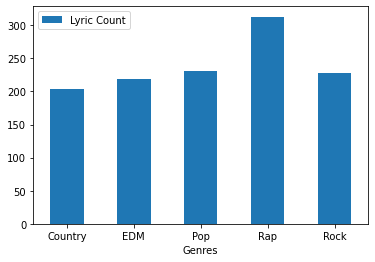

In [103]:
#plots genre mean lyric counts
ax = counts.plot.bar(x='Genres', y='Lyric Count', rot=0)
ax

In [104]:
#loads in positive and negative words for sentiment analysis
positive_words = open("positive.txt", 'r')
negative_words = open("negative.txt", 'r')

n_words = []
for line in negative_words:
    n_words.append(line.strip())
    
p_words = []
for line in positive_words:
    p_words.append(line.strip())
    
(n_words, p_words)

(['2-faced',
  '2-faces',
  'abnormal',
  'abolish',
  'abominable',
  'abominably',
  'abominate',
  'abomination',
  'abort',
  'aborted',
  'aborts',
  'abrade',
  'abrasive',
  'abrupt',
  'abruptly',
  'abscond',
  'absence',
  'absent-minded',
  'absentee',
  'absurd',
  'absurdity',
  'absurdly',
  'absurdness',
  'abuse',
  'abused',
  'abuses',
  'abusive',
  'abysmal',
  'abysmally',
  'abyss',
  'accidental',
  'accost',
  'accursed',
  'accusation',
  'accusations',
  'accuse',
  'accuses',
  'accusing',
  'accusingly',
  'acerbate',
  'acerbic',
  'acerbically',
  'ache',
  'ached',
  'aches',
  'achey',
  'aching',
  'acrid',
  'acridly',
  'acridness',
  'acrimonious',
  'acrimoniously',
  'acrimony',
  'adamant',
  'adamantly',
  'addict',
  'addicted',
  'addicting',
  'addicts',
  'admonish',
  'admonisher',
  'admonishingly',
  'admonishment',
  'admonition',
  'adulterate',
  'adulterated',
  'adulteration',
  'adulterier',
  'adversarial',
  'adversary',
  'adverse

In [105]:
#calculates sentiment score for each song
sentiment_scores = []
for index, row in music_data.iterrows():
    print(str(round(((index+1)/2919)*100, 2)) + "%", end="\r")
    negative_count = 0
    positive_count = 0
    for word in row["Lyrics"]:
        if word in n_words:
            negative_count = negative_count + 1
        elif word in p_words:
            positive_count = positive_count + 1
    sentiment_scores.append(positive_count/(negative_count + 1))

sentiment_scores

[1.125,
 0.2222222222222222,
 2.0,
 3.0,
 0.1,
 1.3636363636363635,
 1.2307692307692308,
 2.3333333333333335,
 0.16666666666666666,
 0.5,
 0.8333333333333334,
 0.0,
 0.0,
 6.0,
 0.47058823529411764,
 0.6666666666666666,
 0.5,
 0.30434782608695654,
 0.5,
 0.4642857142857143,
 0.0,
 0.5384615384615384,
 0.5,
 0.2,
 0.0,
 0.15,
 0.2857142857142857,
 0.3333333333333333,
 0.0,
 0.13043478260869565,
 0.125,
 4.0,
 0.0,
 0.2,
 0.0,
 0.25,
 0.0,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 0.0,
 0.375,
 0.5833333333333334,
 0.0,
 0.0,
 0.2,
 0.875,
 0.3333333333333333,
 0.125,
 0.0,
 1.0,
 0.043478260869565216,
 1.0,
 0.0,
 0.6666666666666666,
 0.1,
 0.4444444444444444,
 0.3333333333333333,
 0.5714285714285714,
 0.0,
 0.23529411764705882,
 1.1666666666666667,
 0.16666666666666666,
 0.5,
 0.06666666666666667,
 0.2,
 0.2727272727272727,
 1.3333333333333333,
 0.7333333333333333,
 0.75,
 0.0625,
 0.14285714285714285,
 0.0,
 0.0,
 0.25,
 0.125,
 1.5,
 9.0,
 0.4,
 0.25,
 0.2727272727272727,
 0.157894736

In [106]:
#adds sentiment scores to database
music_data["Sentiment Score"] = sentiment_scores
music_data

,index,Song Name,Artist,Lyrics,Genres,Lyric Count,Sentiment Score
0,0,When I'm Gone,3 Doors Down,"[there’s, another, world, inside, of, me, that...",Rock,381,1.125000
1,1,Kryptonite,3 Doors Down,"[i, took, a, walk, around, the, world, to, eas...",Rock,284,0.222222
2,2,Best Of Me,A Day To Remember,"[what’d, you, expect, from, me?, it’s, not, my...",Rock,472,2.000000
3,3,City Of Ocala,A Day To Remember,"[fuck, ya!, remember, way, back, when?, they, ...",Rock,360,3.000000
4,4,Dead & Buried,A Day To Remember,"[let, me, find, the, way, that, i, can, make, ...",Rock,278,0.100000
...,...,...,...,...,...,...,...
2914,3019,Alienation,ZSK,"[ich, suche, wirklich, nach, einer, erklärung,...",Rock,212,0.000000
2915,3020,Mein Staat,ZSK,"[hast, du, dich, jemals, gefragt,, ob, das, wi...",Rock,242,0.000000
2916,3021,Riot Radio,ZSK,"[take, a, look, at, you, take, a, look, at, ch...",Rock,174,0.400000
2917,3022,Rough Boy,ZZ Top,"[what, in, the, world’s, come, all, over, me?,...",Rock,129,0.200000


In [107]:
#gets mean sentiment score of each genre
counts = music_data.groupby('Genres', as_index=False)['Sentiment Score'].mean()
counts

,Genres,Sentiment Score
0,Country,0.912261
1,EDM,0.944108
2,Pop,0.960311
3,Rap,0.823031
4,Rock,0.662561


<AxesSubplot:xlabel='Genres'>

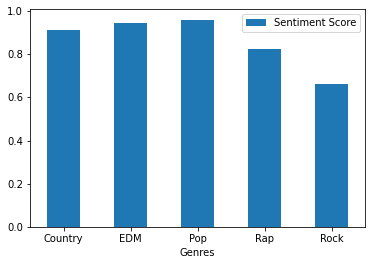

In [108]:
#plots mean genre sentiment score
ax = counts.plot.bar(x='Genres', y='Sentiment Score', rot=0)
ax

In [109]:
#imposes z-score normalization on lyric counts and sentiment scores
from scipy.stats import zscore

music_data["Lyric Count Z-score"] = zscore(music_data["Lyric Count"])
music_data["Sentiment Score Z-score"] = zscore(music_data["Sentiment Score"])
music_data

,index,Song Name,Artist,Lyrics,Genres,Lyric Count,Sentiment Score,Lyric Count Z-score,Sentiment Score Z-score
0,0,When I'm Gone,3 Doors Down,"[there’s, another, world, inside, of, me, that...",Rock,381,1.125000,1.146553,0.226141
1,1,Kryptonite,3 Doors Down,"[i, took, a, walk, around, the, world, to, eas...",Rock,284,0.222222,0.390386,-0.321114
2,2,Best Of Me,A Day To Remember,"[what’d, you, expect, from, me?, it’s, not, my...",Rock,472,2.000000,1.855947,0.756558
3,3,City Of Ocala,A Day To Remember,"[fuck, ya!, remember, way, back, when?, they, ...",Rock,360,3.000000,0.982847,1.362749
4,4,Dead & Buried,A Day To Remember,"[let, me, find, the, way, that, i, can, make, ...",Rock,278,0.100000,0.343613,-0.395204
...,...,...,...,...,...,...,...,...,...
2914,3019,Alienation,ZSK,"[ich, suche, wirklich, nach, einer, erklärung,...",Rock,212,0.000000,-0.170893,-0.455823
2915,3020,Mein Staat,ZSK,"[hast, du, dich, jemals, gefragt,, ob, das, wi...",Rock,242,0.000000,0.062973,-0.455823
2916,3021,Riot Radio,ZSK,"[take, a, look, at, you, take, a, look, at, ch...",Rock,174,0.400000,-0.467123,-0.213347
2917,3022,Rough Boy,ZZ Top,"[what, in, the, world’s, come, all, over, me?,...",Rock,129,0.200000,-0.817923,-0.334585


In [110]:
#divides databas into training and testing data
music_data_train = music_data.iloc[:1460,:]
music_data_validation = music_data.iloc[1460:,:]
music_data_train

,index,Song Name,Artist,Lyrics,Genres,Lyric Count,Sentiment Score,Lyric Count Z-score,Sentiment Score Z-score
0,0,When I'm Gone,3 Doors Down,"[there’s, another, world, inside, of, me, that...",Rock,381,1.125000,1.146553,0.226141
1,1,Kryptonite,3 Doors Down,"[i, took, a, walk, around, the, world, to, eas...",Rock,284,0.222222,0.390386,-0.321114
2,2,Best Of Me,A Day To Remember,"[what’d, you, expect, from, me?, it’s, not, my...",Rock,472,2.000000,1.855947,0.756558
3,3,City Of Ocala,A Day To Remember,"[fuck, ya!, remember, way, back, when?, they, ...",Rock,360,3.000000,0.982847,1.362749
4,4,Dead & Buried,A Day To Remember,"[let, me, find, the, way, that, i, can, make, ...",Rock,278,0.100000,0.343613,-0.395204
...,...,...,...,...,...,...,...,...,...
1455,1520,All My Heroes Are Cornballs,JPEGMAFIA,"[one,, two, jpeg,, because, i, like, jpegs, (s...",Rap,389,0.357143,1.208917,-0.239327
1456,1521,BasicBitchTearGas,JPEGMAFIA,"[i, know,, i, know,, i, know,, i, know, (hahah...",Rap,106,0.375000,-0.997220,-0.228502
1457,1522,BBW,JPEGMAFIA,"[you, think, you, know, me, oh,, it’s, stupid,...",Rap,224,1.000000,-0.077346,0.150367
1458,1523,Beta Male Strategies,JPEGMAFIA,"[hahahahaha,, haha, mmh, (oh),, mmh,, mmh,, mm...",Rap,322,0.368421,0.686616,-0.232490


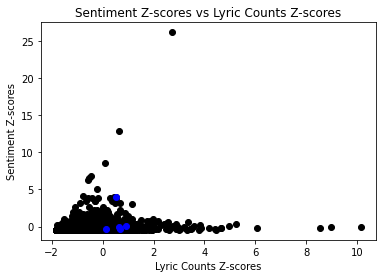

In [111]:
#selects random centroids for k-means cluster algorithm
import numpy as np
import random as rd
import matplotlib.pyplot as plt

data = music_data_train[["Lyric Count Z-score", "Sentiment Score Z-score"]]
centroids = (data.sample(n=5))
plt.scatter(data["Lyric Count Z-score"],data["Sentiment Score Z-score"],c='black')
plt.scatter(centroids["Lyric Count Z-score"],centroids["Sentiment Score Z-score"],c='blue')
plt.xlabel('Lyric Counts Z-scores')
plt.ylabel('Sentiment Z-scores')
plt.title("Sentiment Z-scores vs Lyric Counts Z-scores")
plt.show()

In [112]:
#performs k-means cluster algorithm
for i in range(100):
    data_copy = data
    index = 1
    for index1, row1 in centroids.iterrows():
        distances = []
        for index2, row2 in data_copy.iterrows():
            distance = np.sqrt((row2["Lyric Count Z-score"] - row1["Lyric Count Z-score"])**2 + (row2["Sentiment Score Z-score"] - row1["Sentiment Score Z-score"])**2)
            distances.append(distance)
        data[index] = distances
        index = index + 1
        
    new_centroids = []
    for index, row in data.iterrows():
        min_distance = row[1]
        index = 1
        for i in range(1, 6):
            if row[i] < min_distance:
                min_distance = row[i]
                index = i
        new_centroids.append(index)
    data["Centroid"] = new_centroids
    centroids = data.groupby(["Centroid"]).mean()[["Lyric Count Z-score","Sentiment Score Z-score"]]

data

C:\Users\Owner\AppData\Local\Temp/ipykernel_8176/3499897225.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[index] = distances
C:\Users\Owner\AppData\Local\Temp/ipykernel_8176/3499897225.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Centroid"] = new_centroids


,Lyric Count Z-score,Sentiment Score Z-score,1,2,3,4,5,Centroid
0,1.146553,0.226141,2.663151,0.662203,19.329704,2.613154,1.846647,2
1,0.390386,-0.321114,2.899754,0.275323,19.911424,3.360916,1.043794,2
2,1.855947,0.756558,2.716926,1.546881,18.792728,2.061534,2.684028,2
3,0.982847,1.362749,1.662184,1.543292,18.199098,3.111575,2.266104,2
4,0.343613,-0.395204,2.963069,0.361096,19.988433,3.413715,1.008162,2
...,...,...,...,...,...,...,...,...
1455,1.208917,-0.239327,3.100525,0.630922,19.793414,2.538686,1.856724,2
1456,-0.997220,-0.228502,2.852354,1.588033,19.957429,4.741988,0.350063,5
1457,-0.077346,0.150367,2.368303,0.721378,19.477589,3.826281,0.675141,5
1458,0.686616,-0.232490,2.891454,0.143089,19.805913,3.059720,1.334380,2


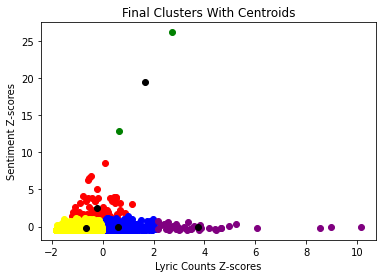

In [113]:
#plots final clusters
colors = ['red', 'blue', 'green', 'purple', 'yellow']
for i in range(1, 6):
    cluster = data[data["Centroid"] == i]
    plt.scatter(cluster["Lyric Count Z-score"], cluster["Sentiment Score Z-score"], color = colors[i - 1])
plt.scatter(centroids["Lyric Count Z-score"], centroids["Sentiment Score Z-score"], color = 'black')
plt.xlabel('Lyric Counts Z-scores')
plt.ylabel('Sentiment Z-scores')
plt.title("Final Clusters With Centroids")
plt.show()

In [114]:
#prints genre proportions for each cluster
data["Genres"] = music_data_train["Genres"]
clusters = []
for i in range(1, 6):
    clusters.append(data[data["Centroid"] == i])

counts = clusters[0]['Genres'].value_counts(normalize = True)
counts

Rock       0.573529
Pop        0.264706
EDM        0.132353
Rap        0.014706
Country    0.014706
Name: Genres, dtype: float64

In [115]:
#prints genre proportions for each cluster
counts = clusters[1]['Genres'].value_counts(normalize = True)
counts

Rock       0.647638
Pop        0.153543
EDM        0.096457
Rap        0.092520
Country    0.009843
Name: Genres, dtype: float64

In [116]:
#prints genre proportions for each cluster
counts = clusters[2]['Genres'].value_counts(normalize = True)
counts

Pop    1.0
Name: Genres, dtype: float64

In [117]:
#prints genre proportions for each cluster
counts = clusters[3]['Genres'].value_counts(normalize = True)
counts

Rap        0.441860
Rock       0.372093
EDM        0.093023
Pop        0.069767
Country    0.023256
Name: Genres, dtype: float64

In [118]:
#prints genre proportions for each cluster
counts = clusters[4]['Genres'].value_counts(normalize = True)
counts

Rock       0.624553
Pop        0.219309
EDM        0.089392
Rap        0.040524
Country    0.026222
Name: Genres, dtype: float64

In [121]:
#classifies genres to each song in testing data
cluster_genres = ["Country", "EDM", "Pop", "Rap", "Rock"]
predictions = []
for index1, row1 in music_data_validation.iterrows():
    distances = []
    for index2, row2 in centroids.iterrows():
        distance = np.sqrt((row2["Lyric Count Z-score"] - row1["Lyric Count Z-score"])**2 + (row2["Sentiment Score Z-score"] - row1["Sentiment Score Z-score"])**2)
        distances.append(distance)
    predictions.append(cluster_genres[distances.index(min(distances))])

predictions

['EDM',
 'EDM',
 'EDM',
 'EDM',
 'Country',
 'EDM',
 'Rock',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'Country',
 'Country',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'EDM',
 'Rock',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'EDM',
 'EDM',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'EDM',
 'Rap',
 'Rock',
 'EDM',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'EDM',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'EDM',
 'Country',
 'EDM',
 'Rock',
 'Rock',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'Rock',
 'Rock',
 'EDM',
 'EDM',
 'Rock',
 'EDM',
 'Rock',
 'EDM',
 'EDM',
 'EDM',
 'Rock',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'Rap',
 'EDM',
 'EDM',
 'Rock',
 'Rock',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'Rap',
 'EDM',
 'EDM',
 'EDM',
 'Rap',
 'Rap',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'Rock',
 'EDM',
 'EDM',
 'Rock',
 'EDM',
 'Rap',
 'Rock',
 'Rock',
 'EDM',
 'EDM',
 'EDM',
 'EDM',
 'E

In [122]:
#computes accuracies of the model
actual_genres = list(music_data_validation["Genres"])
count = 0
accuracies_1 = []
for i in range(len(actual_genres)):
    if actual_genres[i] == predictions[i]:
        count = count + 1
    accuracies_1.append(count/(i+1))
print("Accuracy: " + str(count/len(actual_genres)))

Accuracy: 0.3838245373543523


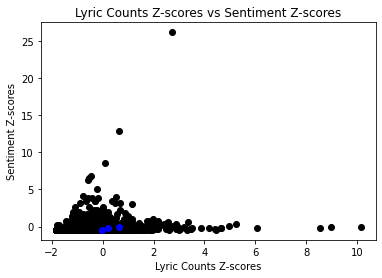

In [123]:
#reruns k-means cluster with new parameters
import numpy as np
import random as rd
import matplotlib.pyplot as plt

music_data_train_filtered = music_data_train[music_data_train["Genres"] != "Country"]
music_data_train_filtered = music_data_train_filtered[music_data_train_filtered["Genres"] != "EDM"]
data = music_data_train_filtered[["Lyric Count Z-score", "Sentiment Score Z-score"]]
centroids = (data.sample(n=3))
plt.scatter(data["Lyric Count Z-score"],data["Sentiment Score Z-score"],c='black')
plt.scatter(centroids["Lyric Count Z-score"],centroids["Sentiment Score Z-score"],c='blue')
plt.xlabel('Lyric Counts Z-scores')
plt.ylabel('Sentiment Z-scores')
plt.title("Lyric Counts Z-scores vs Sentiment Z-scores")
plt.show()

In [124]:
#computes k-means cluster algorithm
for i in range(200):
    data_copy = data
    index = 1
    for index1, row1 in centroids.iterrows():
        distances = []
        for index2, row2 in data_copy.iterrows():
            distance = np.sqrt((row2["Lyric Count Z-score"] - row1["Lyric Count Z-score"])**2 + (row2["Sentiment Score Z-score"] - row1["Sentiment Score Z-score"])**2)
            distances.append(distance)
        data[index] = distances
        index = index + 1
        
    new_centroids = []
    for index, row in data.iterrows():
        min_distance = row[1]
        index = 1
        for i in range(1, 4):
            if row[i] < min_distance:
                min_distance = row[i]
                index = i
        new_centroids.append(index)
    data["Centroid"] = new_centroids
    centroids = data.groupby(["Centroid"]).mean()[["Lyric Count Z-score","Sentiment Score Z-score"]]

data

C:\Users\Owner\AppData\Local\Temp/ipykernel_8176/4121235714.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[index] = distances
C:\Users\Owner\AppData\Local\Temp/ipykernel_8176/4121235714.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Centroid"] = new_centroids


,Lyric Count Z-score,Sentiment Score Z-score,1,2,3,Centroid
0,1.146553,0.226141,5.953165,0.549425,1.574617,2
1,0.390386,-0.321114,6.398249,1.217712,0.805529,3
2,1.855947,0.756558,5.629045,0.898362,2.410492,2
3,0.982847,1.362749,4.806910,1.583847,2.020296,2
4,0.343613,-0.395204,6.469395,1.278735,0.783210,3
...,...,...,...,...,...,...
1455,1.208917,-0.239327,6.421902,0.403582,1.602966,2
1456,-0.997220,-0.228502,6.368000,2.588391,0.617274,3
1457,-0.077346,0.150367,5.913908,1.684223,0.412913,3
1458,0.686616,-0.232490,6.335952,0.910960,1.082086,2


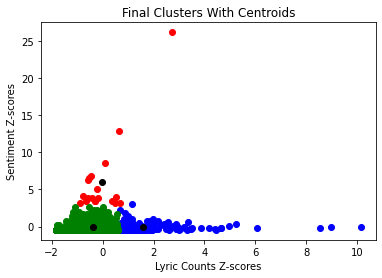

In [125]:
#plots final clusters with centroids
colors = ['red', 'blue', 'green']
for i in range(1, 4):
    cluster = data[data["Centroid"] == i]
    plt.scatter(cluster["Lyric Count Z-score"], cluster["Sentiment Score Z-score"], color = colors[i - 1])
plt.scatter(centroids["Lyric Count Z-score"], centroids["Sentiment Score Z-score"], color = 'black')
plt.xlabel('Lyric Counts Z-scores')
plt.ylabel('Sentiment Z-scores')
plt.title("Final Clusters With Centroids")
plt.show()

In [126]:
#prints genre proportions for each cluster
data["Genres"] = music_data_train_filtered["Genres"]
clusters = []
for i in range(1, 4):
    clusters.append(data[data["Centroid"] == i])

counts = clusters[0]['Genres'].value_counts(normalize = True)
counts

C:\Users\Owner\AppData\Local\Temp/ipykernel_8176/268963233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Genres"] = music_data_train_filtered["Genres"]


Rock    0.631579
Pop     0.368421
Name: Genres, dtype: float64

In [127]:
#prints genre proportions for each cluster
counts = clusters[1]['Genres'].value_counts(normalize = True)
counts

Rock    0.622120
Rap     0.221198
Pop     0.156682
Name: Genres, dtype: float64

In [128]:
#prints genre proportions for each cluster
counts = clusters[2]['Genres'].value_counts(normalize = True)
counts

Rock    0.719282
Pop     0.230624
Rap     0.050095
Name: Genres, dtype: float64

In [129]:
#classifies genre of each song in testing data
cluster_genres = ["Pop", "Rap", "Rock"]
music_data_validation_filtered = music_data_validation[music_data_validation["Genres"] != "Country"]
music_data_validation_filtered = music_data_validation_filtered[music_data_validation_filtered["Genres"] != "EDM"]
predictions = []
for index1, row1 in music_data_validation_filtered.iterrows():
    distances = []
    for index2, row2 in centroids.iterrows():
        distance = np.sqrt((row2["Lyric Count Z-score"] - row1["Lyric Count Z-score"])**2 + (row2["Sentiment Score Z-score"] - row1["Sentiment Score Z-score"])**2)
        distances.append(distance)
    predictions.append(cluster_genres[distances.index(min(distances))])

predictions

['Rock',
 'Rap',
 'Rock',
 'Rap',
 'Pop',
 'Rap',
 'Rock',
 'Rap',
 'Rap',
 'Rock',
 'Rap',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rap',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Rock',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rock',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Rock',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Rock',
 'Rock',
 'Rap',
 'Rock',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Rap',
 'Rock',
 'Rock',
 'Rock',
 'Rap',
 'Rock',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 'Rap',
 

In [130]:
#computes accuracy of the model
actual_genres = list(music_data_validation_filtered["Genres"])
count = 0
accuracies_2 = []
for i in range(len(actual_genres)):
    if actual_genres[i] == predictions[i]:
        count = count + 1
    accuracies_2.append(count/(i+1))
print("Accuracy: " + str(count/len(actual_genres)))

Accuracy: 0.6343511450381679


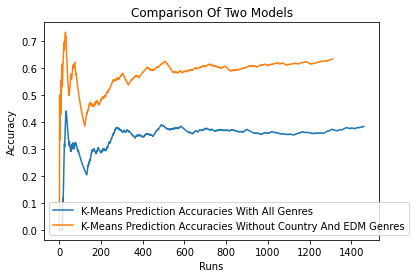

In [131]:
#plots comparison of the two models
num_preds_1 = range(1, len(accuracies_1) + 1)
num_preds_2 = range(1, len(accuracies_2) + 1)
plt.plot(num_preds_1, accuracies_1, label = "K-Means Prediction Accuracies With All Genres")
plt.plot(num_preds_2, accuracies_2, label = "K-Means Prediction Accuracies Without Country And EDM Genres")
plt.legend()
plt.xlabel("Runs")
plt.ylabel("Accuracy")
plt.title("Comparison Of Two Models")
plt.show()